# Somerville Happiness Survey

In [1]:
# imports
import numpy as np
import pandas as pd

import matplotlib
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
# read data
df = pd.read_csv('happiness.csv')
df.head()

,Combined_ID,Year,How.happy.do.you.feel.right.now.,How.satisfied.are.you.with.your.life.in.general.,How.satisfied.are.you.with.Somerville.as.a.place.to.live.,In.general..how.similar.are.you.to.other.people.you.know._2011,When.making.decisions..are.you.more.likely.to.seek.advice.or.decide.for.yourself._2011.,How.satisfied.are.you.with.your.neighborhood.,How.proud.are.you.to.be.a.Somerville.resident._2015,How.would.you.rate.the.following..The.availability.of.information.about.city.services._2015,...,What.is.your.race.or.ethnicity._2015,Do.you.have.children.age.18.or.younger.who.live.with.you.,Describe.your.housing.status.in.Somerville.,Do.you.plan.to.move.away.from.Somerville.in.the.next.two.years.,How.long.have.you.lived.here.,What.is.your.annual.household.income.,What.neighborhood.do.you.live.in.,Are.you.a.student.,Ward,Precinct
0,1,2015,7,5,7,NaN,NaN,5.0,9.0,3.0,...,"White, Hispanic / Latino",No,Rent,No,4-7 years,"$100,000 to $149,999",Winter Hill,No,4.0,3.0
1,2,2015,8,8,7,NaN,NaN,8.0,7.0,3.0,...,White,No,Rent,Yes,1-3 years,"$25,000 to $49,999",Teele Square,Yes,7.0,2.0
2,3,2015,5,9,6,NaN,NaN,7.0,5.0,3.0,...,White,No,Rent,No,21 years or more,"$25,000 to $49,999",Ward 3,No,3.0,2.0
3,4,2015,5,8,9,NaN,NaN,9.0,9.0,5.0,...,White,No,Own,No,16-20 years,NaN,Union Square,No,3.0,1.0
4,5,2015,7,9,8,NaN,NaN,7.0,7.0,5.0,...,White,Yes,Own,No,4-7 years,"$150,000 or more",Near the hospital,No,5.0,3.0


In [3]:
try:
    def assert_read():
        """Read dataset into variable df"""
        if df.shape[0] == 6545 and df.shape[1] == 43:
            return True
        else:
            return False
    val = assert_read()
except Exception as e:
    print('Your assertion block throws error {}', str(e))
else:
    if val:
        print('File reading passed')

File reading passed


### Exploring the data

Since this is a survey dataset, many values are likely to be null (or bogus entries). So, it helps to narrow down the variables we should be looking at.

- Count the number of null values across different variables in the dataset.
- Only analyze the variables with significant data (i.e. not too many null values).

In [4]:
cols_to_check_null_for = df.columns[3:]

In [5]:
null_df = []

for el in cols_to_check_null_for:
    null_df.append({'column': el, 'null_count': df[el].isnull().sum(),
                    'null_share': df[el].isnull().sum()/df.shape[0]})
    
null_df = pd.DataFrame(null_df)

A lot of variables seem to have more than 90% of null values. It is better to ignore those variables while trying to analyze happiness index as they give us a small sample size to work with, meaning we can't draw any useful conclusions.

In [6]:
null_df.sort_values(ascending=False, by='null_share')

,column,null_count,null_share
27,What.language..other.than.English..do.you.spea...,6382,0.975095
14,How.would.you.rate.the.following..Your.trust.i...,6365,0.972498
32,Describe.your.housing.status.in.Somerville.,6364,0.972345
30,What.is.your.race.or.ethnicity._2015,6363,0.972193
6,How.would.you.rate.the.following..The.availabi...,6363,0.972193
22,How.satisfied.are.you.with.the.appearance.of.p...,6363,0.972193
5,How.proud.are.you.to.be.a.Somerville.resident....,6363,0.972193
19,How.safe.do.you.feel.walking.in.your.community...,6362,0.972040
16,How.would.you.rate.the.following..The.maintena...,6361,0.971887
29,Are.you.of.Hispanic..Latino..or.Spanish.origin...,6359,0.971581


Retain only those variables with less than 10% null values.

In [7]:
cols_to_focus_on = null_df.loc[null_df['null_share'] <  0.1, 'column'].tolist()

In [8]:
for el in cols_to_focus_on:
    print(el)

How.satisfied.are.you.with.your.life.in.general.
How.satisfied.are.you.with.Somerville.as.a.place.to.live.
In.general..how.similar.are.you.to.other.people.you.know._2011
When.making.decisions..are.you.more.likely.to.seek.advice.or.decide.for.yourself._2011.
The.availability.of.affordable.housing_2011
How.would.you.rate.the.following..The.overall.quality.of.public.schools.in.your.community._2011
How.would.you.rate.the.following..The.beauty.or.physical.setting_2011
How.would.you.rate.the.following..The.effectiveness.of.the.local.police_2011_2013
What.is.your.gender._2011
Age.
Marital.status._2011
What.is.your.race_2011_2013
How.long.have.you.lived.here.
What.is.your.annual.household.income.


In [9]:
df['Year'].value_counts()

2011    6167
2013     193
2015     185
Name: Year, dtype: int64

### Data cleaning strategy

A lot of values are bogus entries, typos and are unsuitable for building a prediction model.

We take the following approach to clean the columns which ask for user ratings on a particular scale.
- Replace all decimals (5.5) with floor integer values (5)
- Anything else could be a bogus entry. Replace with 'R' (which is just a representation for missing values). Since bogus entries as few, they should not affect the model much.

Note that we can do a thorough data cleaning job but this provides us with a good enough base.

Since most responses are from 2011 (a mere 167 from 2013), we can just work with 2011 data.

In [10]:
df = df[df['Year'] == 2011]

In [11]:
# function to clean ratings data
def _clean_ratings(x):
    if x in ['1.5', '2.5', '3.5', '4.5', '5.5', '6.5', '7.5', '8.5', '9.5']:
        # take floor integer
        return x[0]
    elif x in ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']:
        return x
    else:
        return 'R'

In [12]:
rating_cols = ['How.satisfied.are.you.with.your.life.in.general.',
               'How.satisfied.are.you.with.Somerville.as.a.place.to.live.',
               'In.general..how.similar.are.you.to.other.people.you.know._2011',
               'When.making.decisions..are.you.more.likely.to.seek.advice.or.decide.for.yourself._2011.',
               'The.availability.of.affordable.housing_2011',
               'How.would.you.rate.the.following..The.overall.quality.of.public.schools.in.your.community._2011',
               'How.would.you.rate.the.following..The.beauty.or.physical.setting_2011',
               'How.would.you.rate.the.following..The.effectiveness.of.the.local.police_2011_2013']

In [13]:
# cleaning all rating columns
for col in rating_cols:
    df[col] = df[col].apply(_clean_ratings)

In [14]:
df['How.happy.do.you.feel.right.now.'] = df['How.happy.do.you.feel.right.now.'].apply(_clean_ratings)

#### Sanity check for other important features

Checking the value counts for any bogus entries or if any feature needs more cleaning.

In [15]:
df['What.is.your.annual.household.income.'].value_counts()

100,000 and up       1584
50,000 - $59,999      531
R                     520
40,000 - $49,999      513
60,000 - $69,999      462
30,000 - $39,999      456
20,000 - $29,999      420
70,000 - $79,999      396
80,000 - $89,999      358
10,000 - $19,999      350
90,000 - $99,999      324
Less than $10,000     253
Name: What.is.your.annual.household.income., dtype: int64

In [16]:
df['Age.'].value_counts()

31-40    1564
26-30    1289
61+       992
41-50     847
51-60     679
22-25     479
R         262
18-21      55
Name: Age., dtype: int64

In [17]:
df['What.is.your.gender._2011'].value_counts()

Female         3607
Male           2233
R               307
Transgender      20
Name: What.is.your.gender._2011, dtype: int64

In [18]:
df['Marital.status._2011'].value_counts()

Single, Never Married    2732
Married                  2314
Divorced                  528
Widowed                   307
R                         286
Name: Marital.status._2011, dtype: int64

In [19]:
pd.DataFrame(df['What.is.your.race_2011_2013'].value_counts()).reset_index()

,index,What.is.your.race_2011_2013
0,"White, non-Hispanic",4974
1,Asian/Pacific Islander,332
2,R,315
3,"White, Hispanic Origin",168
4,African-American,161
5,Hispanic,88
6,Native American,46
7,"White, non-Hispanic, Native American",29
8,"White, non-Hispanic, Asian/Pacific Islander",26
9,"White, non-Hispanic, African-American",7


We would be better off cleaning **race** feature, that gives us broad categories to work with.

In [20]:
def _clean_race(x):
    if 'White, non-Hispanic' in x:
        return 'White, non-Hispanic'
    elif 'White, Hispanic Origin' in x:
        return 'White, Hispanic Origin'
    elif x in ['Asian/Pacific Islander', 'R', 'African-American', 'Hispanic', 'Native American']:
        return x
    else:
        return 'Others'

df['What.is.your.race_2011_2013'] = df['What.is.your.race_2011_2013'].apply(_clean_race)

df['What.is.your.race_2011_2013'].value_counts()

White, non-Hispanic       5048
Asian/Pacific Islander     332
R                          315
White, Hispanic Origin     173
African-American           161
Hispanic                    88
Native American             46
Others                       4
Name: What.is.your.race_2011_2013, dtype: int64

### Data visualization

Plot a distribution of the happiness index to get a general idea of how happy the Somerville residents are.

[Text(0,0.5,'Count of residents'), Text(0.5,0,'Happiness index')]

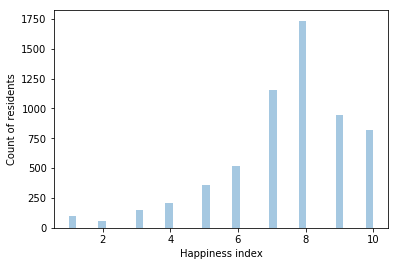

In [21]:
plt = sns.distplot(
    df.loc[df['How.happy.do.you.feel.right.now.'] != 'R', 'How.happy.do.you.feel.right.now.'].astype(int),
    kde=False)
plt.set(xlabel='Happiness index', ylabel='Count of residents')

### Logistic Regression Training

We fit a multi-class logistic regression to the dataset. Since this is a multi-class problem, we use the one-vs-all strategy to build our model and evaluate the predictions using mean squared error.

We ignore all null values in output variable while building the model.

In [22]:
# for prediction, drop cases where happiness index is not a valid rating.
df = df.loc[df['How.happy.do.you.feel.right.now.'] != 'R', :]

In [23]:
# label encode for all features, all of which are categorical variables
le  = LabelEncoder()
X = pd.DataFrame()

# fill null with R
for col in cols_to_focus_on:
    X[col] = le.fit_transform(df[col].fillna('R'))

y = df['How.happy.do.you.feel.right.now.']

A stratified split ensures classes are balanced in the training and test set. Split the dataset as 20% test, 80% train.

In [24]:
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
sss.get_n_splits(X, y)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [25]:
# fit the multi-class logistic regression model
happiness_model = LogisticRegression(multi_class='ovr', max_iter=1000, solver='liblinear')
happiness_model.fit(X_train, y_train)
y_HAT = happiness_model.predict(X_test)

#### Evaluation using mean squared error

In [26]:
# calculate mean squared error
# convert y_HAT and y_pred to integers
y_HAT = y_HAT.astype(int)
y_test = y_test.astype(int)
MSE_Test = mean_squared_error(y_HAT, y_test)
print('MSE:', MSE_Test)

MSE: 4.7988410596


In [27]:
# assertion block
try:
    def verify_answer():
        """Returns true if MSE < 5."""
        if MSE_Test < 6:
            return True
        else:
            return False
        
    ref_assert_var = verify_answer()
except Exception as e:
    print('Your assertion block throws error: {}'.format(e))
else:
    if ref_assert_var:
        print('Congratulations! Your model passed the test')

Congratulations! Your model passed the test
